In [1]:
from pandas_datareader import data as pdr

In [2]:
import yfinance as tf


In [4]:
tf.pdr_override()

In [5]:
sec = pdr.get_data_yahoo('005930.KS')
msft = pdr.get_data_yahoo('MSFT')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
sec

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4623.467285,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4222.414062,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4252.682129,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4192.145508,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4366.187500,46880000
...,...,...,...,...,...,...
2022-08-09,60600.0,60700.0,59600.0,60000.0,60000.000000,18251170
2022-08-10,58900.0,59200.0,58600.0,59100.0,59100.000000,18084349
2022-08-11,59600.0,60000.0,59300.0,59900.0,59900.000000,15141941


In [7]:
spce = pdr.get_data_yahoo('SPCE')
spce

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-29,10.500,10.500,10.000,10.10,10.10,212800
2017-10-02,10.150,10.200,10.050,10.08,10.08,36500
2017-10-03,10.091,10.100,10.079,10.10,10.10,13300
2017-10-04,10.100,10.150,10.093,10.11,10.11,55600
2017-10-05,10.150,10.150,10.100,10.10,10.10,212500
...,...,...,...,...,...,...
2022-08-09,6.730,7.020,6.520,6.64,6.64,6574300
2022-08-10,6.910,7.060,6.740,7.02,7.02,8380600
2022-08-11,7.100,7.369,6.820,6.98,6.98,9454600


In [8]:
spce.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-09,6.73,7.020,6.52,6.64,6.64,6574300
2022-08-10,6.91,7.060,6.74,7.02,7.02,8380600
2022-08-11,7.10,7.369,6.82,6.98,6.98,9454600
2022-08-12,7.04,7.190,6.80,7.12,7.12,7792000
2022-08-15,7.03,7.329,6.95,7.08,7.08,5800800


In [10]:
spce.index


DatetimeIndex(['2017-09-29', '2017-10-02', '2017-10-03', '2017-10-04',
               '2017-10-05', '2017-10-06', '2017-10-09', '2017-10-10',
               '2017-10-11', '2017-10-12',
               ...
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
               '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11',
               '2022-08-12', '2022-08-15'],
              dtype='datetime64[ns]', name='Date', length=1227, freq=None)

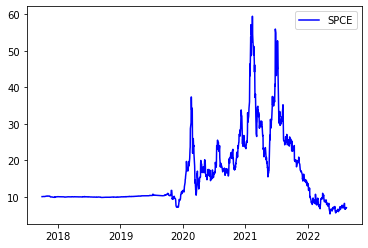

In [14]:
import matplotlib.pyplot as plt
plt.plot(spce.index, spce.Close, 'b', label='SPCE')
plt.legend(loc='best')
plt.show()

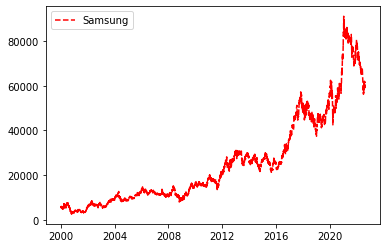

In [15]:
plt.plot(sec.index, sec.Close, 'r--', label='Samsung')
plt.legend(loc='best')
plt.show()

In [16]:
type(sec['Close'])

pandas.core.series.Series

In [17]:
sec['Close']

Date
2000-01-04     6110.0
2000-01-05     5580.0
2000-01-06     5620.0
2000-01-07     5540.0
2000-01-10     5770.0
               ...   
2022-08-09    60000.0
2022-08-10    59100.0
2022-08-11    59900.0
2022-08-12    60200.0
2022-08-16    61000.0
Name: Close, Length: 5679, dtype: float64

In [18]:
sec['Close'].shift(1)

Date
2000-01-04        NaN
2000-01-05     6110.0
2000-01-06     5580.0
2000-01-07     5620.0
2000-01-10     5540.0
               ...   
2022-08-09    60800.0
2022-08-10    60000.0
2022-08-11    59100.0
2022-08-12    59900.0
2022-08-16    60200.0
Name: Close, Length: 5679, dtype: float64

In [19]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100

In [20]:
sec_dpc

Date
2000-01-04         NaN
2000-01-05   -8.674304
2000-01-06    0.716846
2000-01-07   -1.423488
2000-01-10    4.151625
                ...   
2022-08-09   -1.315789
2022-08-10   -1.500000
2022-08-11    1.353638
2022-08-12    0.500835
2022-08-16    1.328904
Name: Close, Length: 5679, dtype: float64

In [21]:
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2000-01-04    0.000000
2000-01-05   -8.674304
2000-01-06    0.716846
2000-01-07   -1.423488
2000-01-10    4.151625
Name: Close, dtype: float64

In [23]:
spce_dpc = (spce['Close'] / spce['Close'].shift(1) - 1) * 100

In [24]:
spce_dpc.iloc[0] = 0
spce_dpc

Date
2017-09-29    0.000000
2017-10-02   -0.198024
2017-10-03    0.198417
2017-10-04    0.099003
2017-10-05   -0.098905
                ...   
2022-08-09   -2.496330
2022-08-10    5.722893
2022-08-11   -0.569800
2022-08-12    2.005729
2022-08-15   -0.561797
Name: Close, Length: 1227, dtype: float64

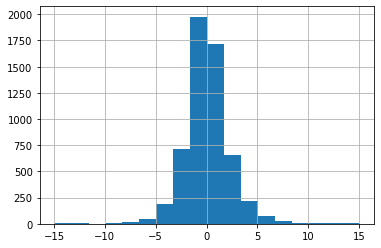

In [25]:
plt.hist(sec_dpc, bins=18)
plt.grid(True)

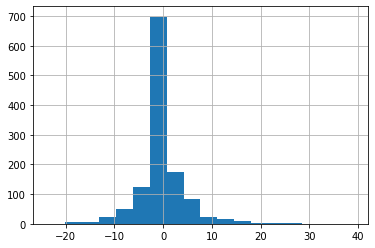

In [26]:
plt.hist(spce_dpc, bins=18)
plt.grid(True)

In [27]:
sec.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5679.000000,5679.000000,5679.000000,5679.000000,5679.000000,5.679000e+03
mean,25254.560662,25508.304279,24995.018489,25249.191759,21998.820920,2.171192e+07
std,20337.294251,20504.080838,20162.234586,20321.946783,19918.218092,1.539307e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,2065.804443,0.000000e+00
25%,10220.000000,10380.000000,10080.000000,10250.000000,7824.330078,1.179838e+07
50%,16900.000000,17020.000000,16620.000000,16880.000000,13460.038086,1.770370e+07
75%,32600.000000,33000.000000,32260.000000,32800.000000,27715.035156,2.707130e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,88367.843750,1.642150e+08


In [28]:
sec_dpc.describe()

count    5679.000000
mean        0.064778
std         2.205296
min       -14.920635
25%        -1.072961
50%         0.000000
75%         1.158921
max        15.000000
Name: Close, dtype: float64

In [29]:
spce_dpc.describe()

count    1227.000000
mean        0.091315
std         4.970330
min       -23.582611
25%        -0.932932
50%         0.000000
75%         0.822782
max        38.872335
Name: Close, dtype: float64

In [30]:
sec_dpc_cp = ((100 + sec_dpc) / 100).cumprod() * 100 - 100
sec_dpc_cp

Date
2000-01-04      0.000000
2000-01-05     -8.674304
2000-01-06     -8.019640
2000-01-07     -9.328969
2000-01-10     -5.564648
                 ...    
2022-08-09    881.996727
2022-08-10    867.266776
2022-08-11    880.360065
2022-08-12    885.270049
2022-08-16    898.363339
Name: Close, Length: 5679, dtype: float64

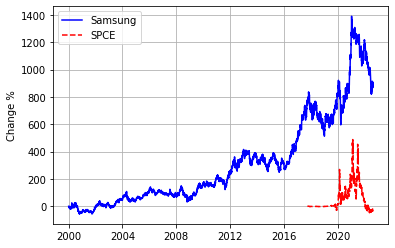

In [32]:
spce_dpc_cp = ((100 + spce_dpc) / 100).cumprod() * 100 - 100

plt.plot(sec.index, sec_dpc_cp, 'b', label='Samsung')
plt.plot(spce.index, spce_dpc_cp, 'r--', label='SPCE')
plt.ylabel("Change %")
plt.grid(True)
plt.legend(loc='best')
plt.show()